In [ ]:
import pandas as pd
df = pd.read_csv('/content/BTC-USD (1).csv', index_col = 0, parse_dates= True)
print(df.shape)
df.head(10)
df=df.dropna()

(1827, 6)


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-16,30297.472656,30437.560547,30089.669922,30249.132813,30249.132813,8.516564e+09
2023-07-17,30249.626953,30336.400391,29685.783203,30145.888672,30145.888672,1.324016e+10
2023-07-18,30147.070313,30233.656250,29556.427734,29856.562500,29856.562500,1.313890e+10
2023-07-19,29862.046875,30184.181641,29794.269531,29913.923828,29913.923828,1.212860e+10
2023-07-21,29803.185547,29940.945313,29741.357422,29761.955078,29761.955078,1.355410e+10


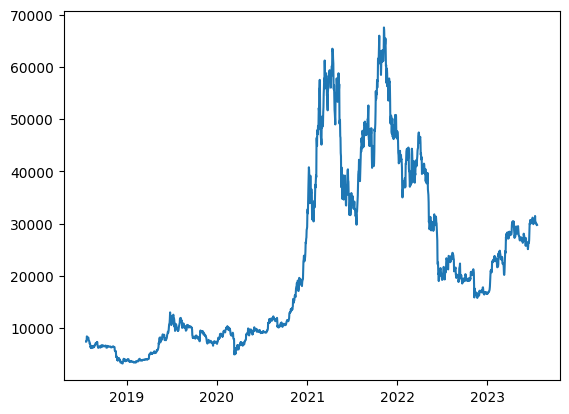

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Adj Close'])
plt.show()

In [ ]:

print(len(df)*0.9)
print(int(len(df)*0.9))

1643.4
1643


In [ ]:
n_rows = int(len(df)*0.9)
train = list(df[:n_rows]['Adj Close'])
test = list(df[n_rows:]['Adj Close'])
print(len(train))
#train.shape
print(len(test))

1643
183


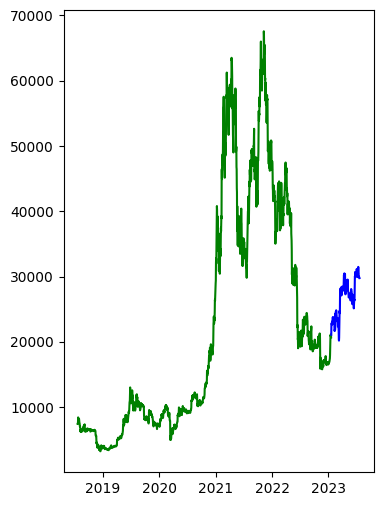

In [ ]:
plt.figure(figsize = (4,6))
plt.plot(df[:n_rows]['Adj Close'],'-g', label = 'train')
plt.plot(df[n_rows:]['Adj Close'],'-b', label = 'test')
plt.show()

In [ ]:
len(test)

183

using auto - arima to select the best order

In [ ]:
!pip install pmdarima
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

#best model will have min AIC
stepwise_fit = auto_arima(df['Adj Close'],
                          suppress_warnings=True)

stepwise_fit.summary()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.3 MB/s eta 0:00:00


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1826
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -15217.879
Date:                Tue, 08 Aug 2023   AIC                          30445.758
Time:                        16:31:39   BIC                          30473.305
Sample:                             0   HQIC                         30455.920
                               - 1826                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8663      0.032     27.049      0.000       0.804       0.929
ar.L2         -0.8967      0.030    -29.511      0.000      -0.956      -0.837
ma.L1         -0.9021      0.029    -31.368      0.000      -0.958      -0.846
ma.L2          0.9229      0.027     34.221      0.000       0.870       0.976
sigma2      1.033e+06    1.5e+04     68.941      0.000       1e+06    1.06e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6406.41
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              10.10   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1826
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -15217.879
Date:                Tue, 08 Aug 2023   AIC                          30445.758
Time:                        16:32:42   BIC                          30473.305
Sample:                             0   HQIC                         30455.920
                               - 1826                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8663      0.032     27.049      0.000       0.804       0.929
ar.L2         -0.8967      0.030    -29.511      0.000      -0.956      -0.837
ma.L1         -0.9021      0.029    -31.368      0.000      -0.958      -0.846
ma.L2          0.9229      0.027     34.221      0.000       0.870       0.976
sigma2      1.033e+06    1.5e+04     68.941      0.000       1e+06    1.06e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6406.41
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              10.10   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Model: SARIMAX(2, 1, 2)is a good model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
n_test = len(test)
preds = []
for i in range(n_test):
  model = ARIMA(train, order = (2, 1, 2))
  model_fit = model.fit()
  output = model_fit.forecast()
  y_hat = output[0]
  preds.append(y_hat)
  actual_test = test[i]
  train.append(actual_test)

In [ ]:
print(y_hat)

29828.27879317762


In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1825
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -15209.995
Date:                Tue, 08 Aug 2023   AIC                          30429.989
Time:                        16:40:47   BIC                          30457.533
Sample:                             0   HQIC                         30440.150
                               - 1825                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9115      0.023     39.558      0.000       0.866       0.957
ar.L2         -0.9344      0.021    -43.767      0.000      -0.976      -0.893
ma.L1         -0.9382      0.020    -46.403      0.0

183


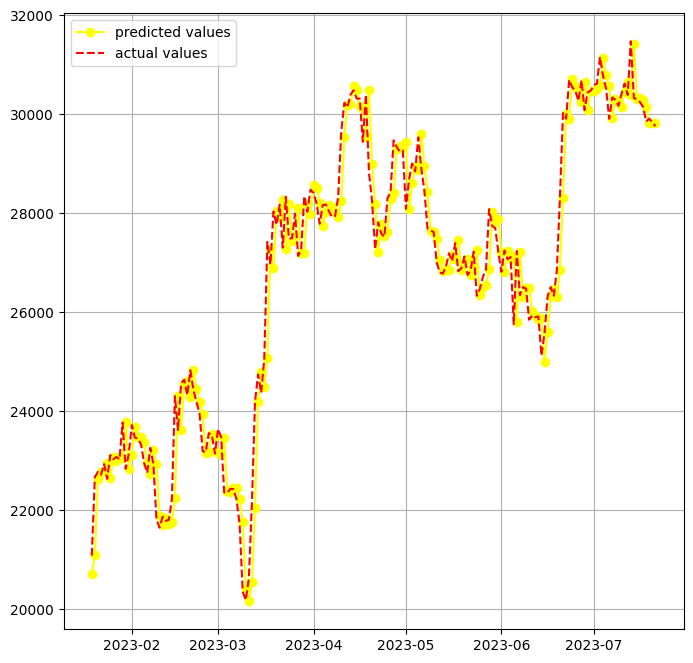

In [ ]:
plt.figure(figsize = (8,8))
plt.grid(True)

date_range = df[n_rows:].index
print(len(date_range))
plt.plot(date_range, preds, color = 'yellow',marker ='o', label ='predicted values')
plt.plot(date_range, test, color = 'red',linestyle = 'dashed', label ='actual values')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(preds,test))
print(rmse)

639.9757346159097


In [ ]:
mse = mean_squared_error(test, preds)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 639.975735


In [ ]:
mse = mean_squared_error(test, preds)
print('MSE: %f' % mse)

MSE: 409568.940897


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test,preds))

ValueError: ignored